In [29]:
import numpy as np
import audioflux as af
import IPython.display as ipd
import matplotlib.pyplot as plt

check data

In [21]:
audio, sr = af.read('data/0dB/fan/id_00/normal/00000001.wav')
print("sampling_rate : {}".format(sr))
print("voice shape : {}".format(audio.shape))
print("voice dtype : {}".format(audio.dtype))

sampling_rate : 16000
voice shape : (160000,)
voice dtype : float32


# listen a sample

In [4]:
ipd.Audio('data/0dB/fan/id_00/normal/00000001.wav')

# Visible

left is normal, right is abnormal

## original

### SNR: 0dB

In [23]:
audio_0db = [1, 2, 3, 4, 5, 6, 7, 8]

audio_0db[0], sr = af.read('data/0dB/fan/id_00/normal/00000001.wav')
audio_0db[1], sr = af.read('data/0dB/fan/id_00/abnormal/00000001.wav')

audio_0db[2], sr = af.read('data/0dB/pump/id_00/normal/00000001.wav')
audio_0db[3], sr = af.read('data/0dB/pump/id_00/abnormal/00000001.wav')

audio_0db[4], sr = af.read('data/0dB/slider/id_00/normal/00000001.wav')
audio_0db[5], sr = af.read('data/0dB/slider/id_00/abnormal/00000001.wav')

audio_0db[6], sr = af.read('data/0dB/valve/id_00/normal/00000001.wav')
audio_0db[7], sr = af.read('data/0dB/valve/id_00/abnormal/00000001.wav')

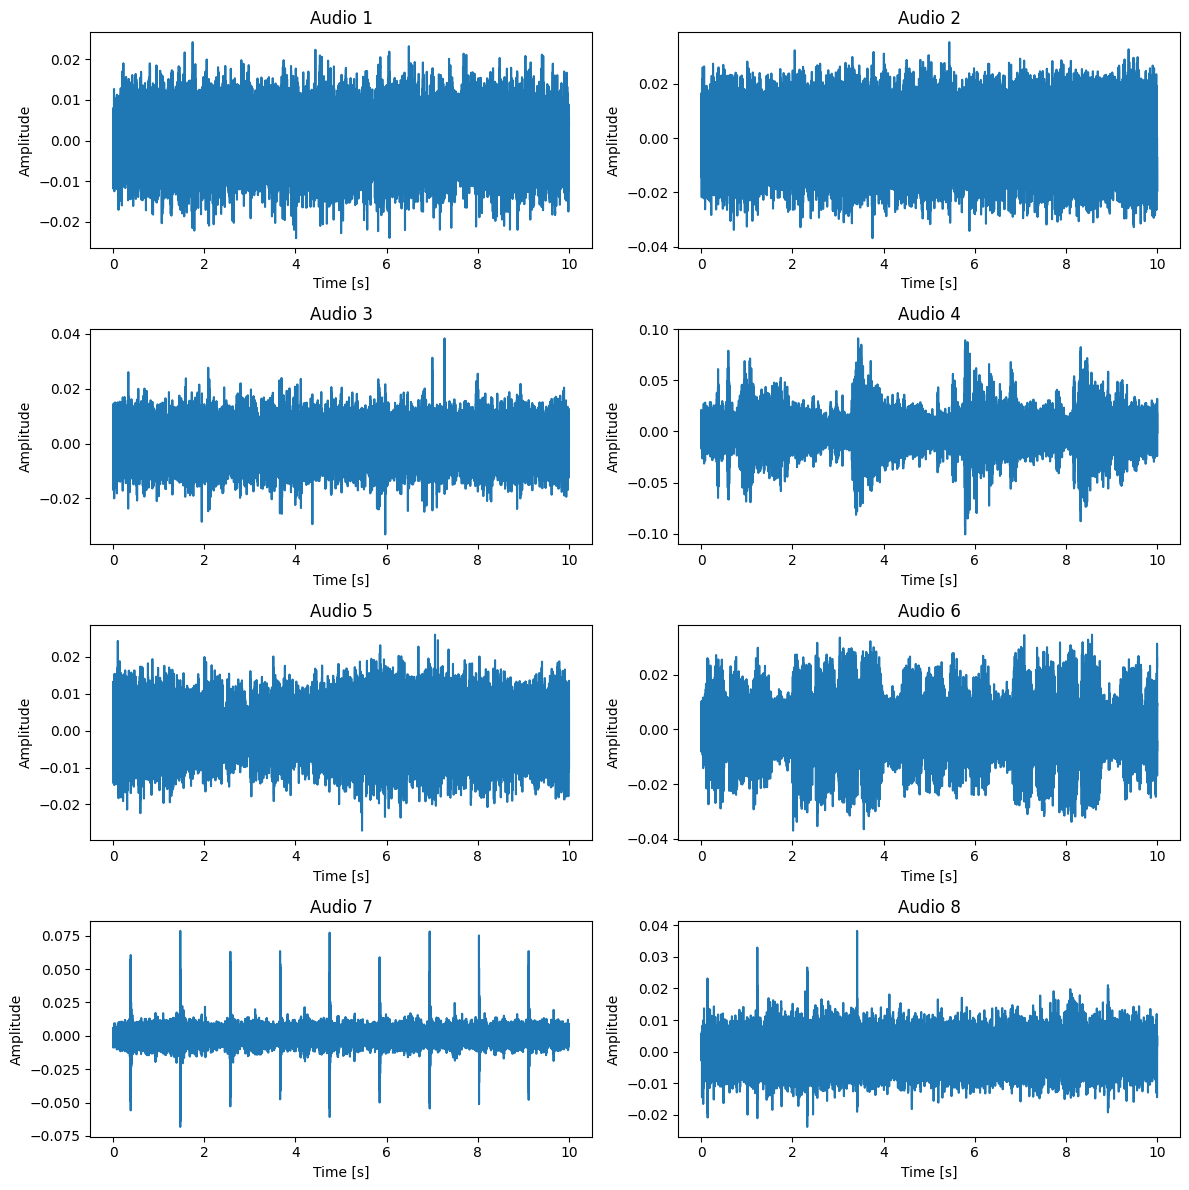

In [24]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制时域图
for i, ax in enumerate(axes.flatten()):
    audio_data = audio_0db[i]
    time = np.arange(len(audio_data)) / sr
    ax.plot(time, audio_data)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Audio {i+1}')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()


### SNR: 6dB

In [27]:
audio_6db = [1, 2, 3, 4, 5, 6, 7, 8]

audio_6db[0], sr = af.read('data/6dB/fan/id_00/normal/00000001.wav')
audio_6db[1], sr = af.read('data/6dB/fan/id_00/abnormal/00000001.wav')

audio_6db[2], sr = af.read('data/6dB/pump/id_00/normal/00000001.wav')
audio_6db[3], sr = af.read('data/6dB/pump/id_00/abnormal/00000001.wav')

audio_6db[4], sr = af.read('data/6dB/slider/id_00/normal/00000001.wav')
audio_6db[5], sr = af.read('data/6dB/slider/id_00/abnormal/00000001.wav')

audio_6db[6], sr = af.read('data/6dB/valve/id_00/normal/00000001.wav')
audio_6db[7], sr = af.read('data/6dB/valve/id_00/abnormal/00000001.wav')

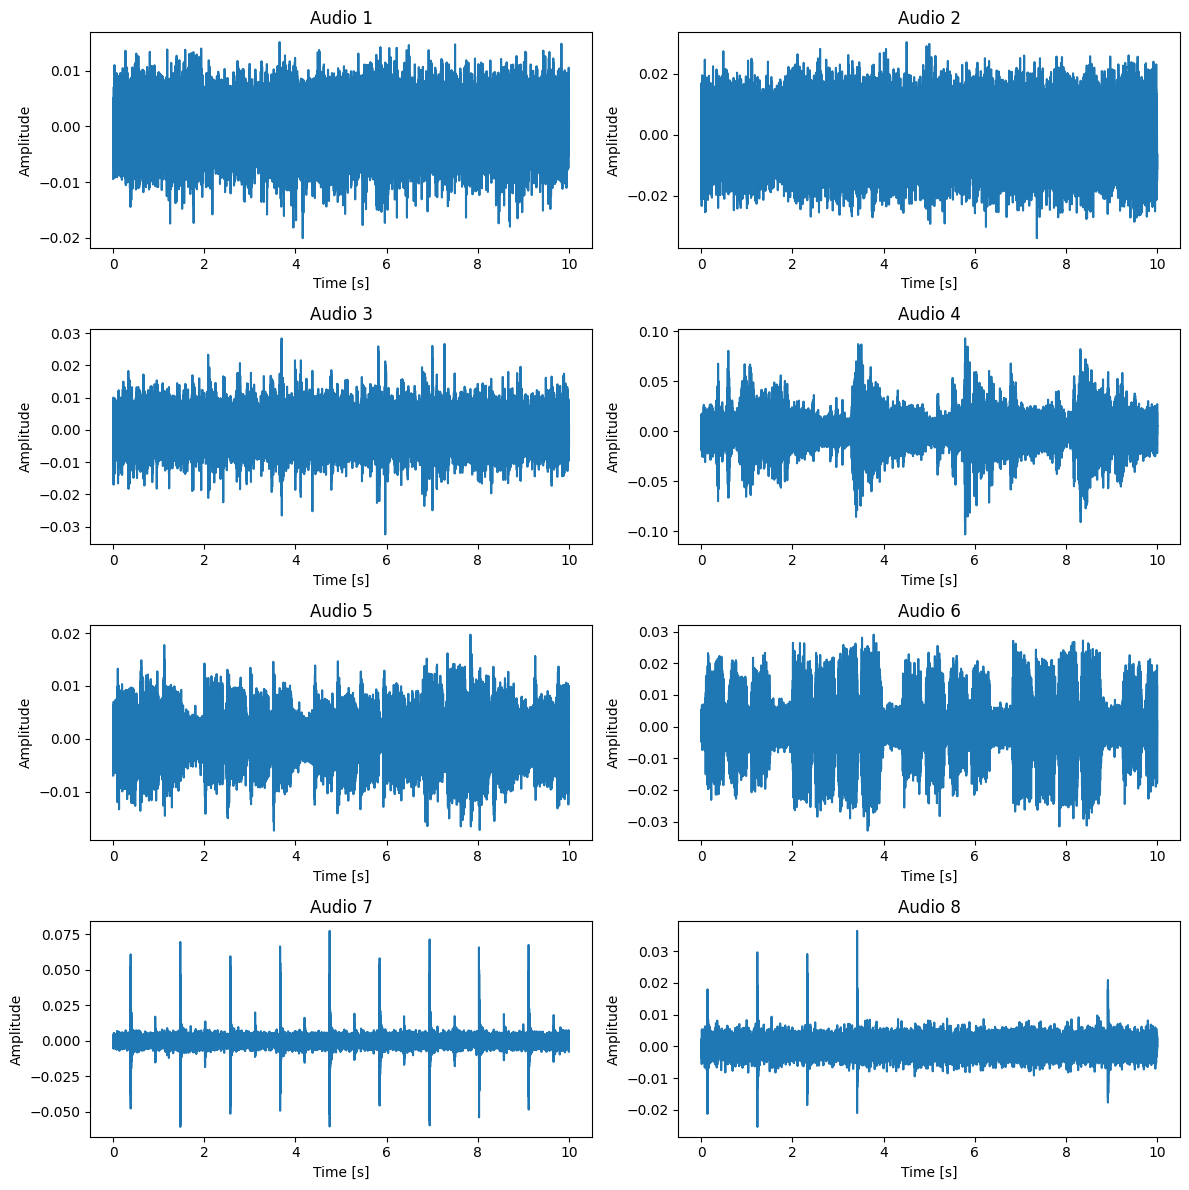

In [28]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制时域图
for i, ax in enumerate(axes.flatten()):
    audio_data = audio_6db[i]
    time = np.arange(len(audio_data)) / sr
    ax.plot(time, audio_data)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Audio {i+1}')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()


### SNR: -6dB

In [30]:
audio_min6db = [1, 2, 3, 4, 5, 6, 7, 8]

audio_min6db[0], sr = af.read('data/-6dB/fan/id_00/normal/00000001.wav')
audio_min6db[1], sr = af.read('data/-6dB/fan/id_00/abnormal/00000001.wav')

audio_min6db[2], sr = af.read('data/-6dB/pump/id_00/normal/00000001.wav')
audio_min6db[3], sr = af.read('data/-6dB/pump/id_00/abnormal/00000001.wav')

audio_min6db[4], sr = af.read('data/-6dB/slider/id_00/normal/00000001.wav')
audio_min6db[5], sr = af.read('data/-6dB/slider/id_00/abnormal/00000001.wav')

audio_min6db[6], sr = af.read('data/-6dB/valve/id_00/normal/00000001.wav')
audio_min6db[7], sr = af.read('data/-6dB/valve/id_00/abnormal/00000001.wav')

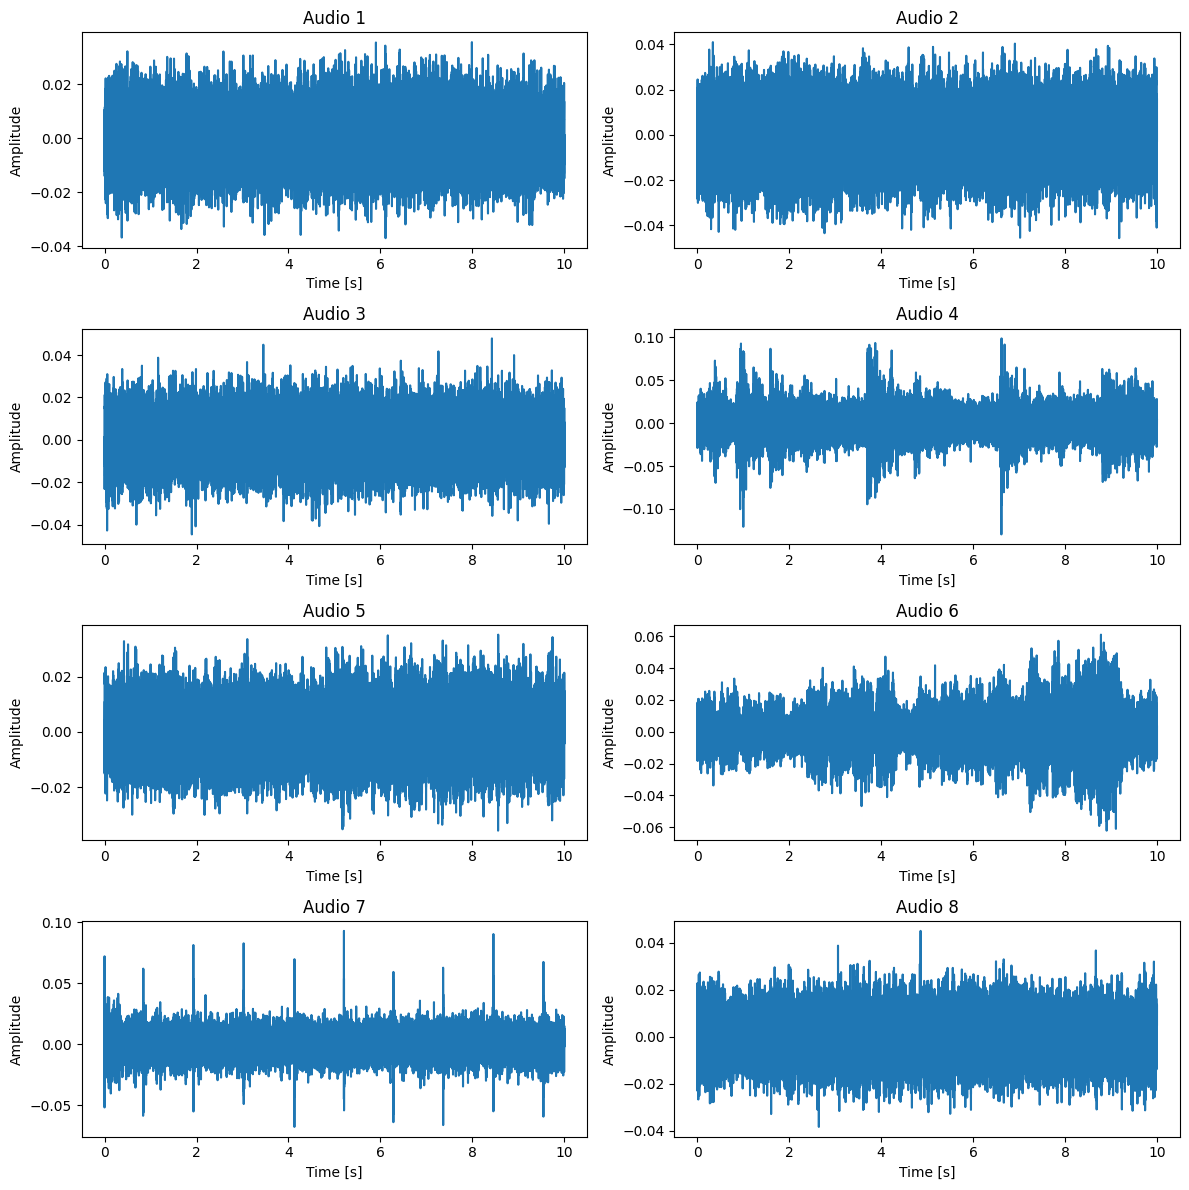

In [31]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制时域图
for i, ax in enumerate(axes.flatten()):
    audio_data = audio_min6db[i]
    time = np.arange(len(audio_data)) / sr
    ax.plot(time, audio_data)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Audio {i+1}')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()


## MFCC

前置知识

MFCC（Mel Frequency Cepstral Coefficients）是语音信号处理中的一种特征提取方法。它主要用于将语音信号转换为一组准确表示声学特征的系数。以下是关于MFCC参数的一些解释：

1. **预加重**：在提取MFCC之前，通常会对语音信号进行预加重。这是通过应用一个高通滤波器来突出高频部分，以平衡信号的频谱。

2. **分帧**：语音信号通常被划分为小的时间片段，称为帧。每个帧通常包含10到30毫秒的语音信号。

3. **加窗**：对每个帧应用一个窗函数（例如汉明窗），以减少边界效应，并使信号在时域上平滑过渡。

4. **快速傅里叶变换（FFT）**：对每个帧进行FFT，从时域转换为频域。

5. **梅尔滤波器组**：在频域上，将声音信号通过一系列梅尔滤波器进行滤波，这些滤波器的形状近似模拟了人耳对不同频率的感知。

6. **对数操作**：对通过梅尔滤波器组后的结果取对数，以便表示频率轴上的声音强度。

7. **离散余弦变换（DCT）**：对取对数后的滤波器输出应用DCT，以获取最终的MFCC系数。通过DCT可以压缩数据并减少特征之间的冗余。

In [32]:
# read data
audio_6db = [1, 2, 3, 4, 5, 6, 7, 8]
audio_0db = [1, 2, 3, 4, 5, 6, 7, 8]
audio_min6db = [1, 2, 3, 4, 5, 6, 7, 8]

audio_6db[0], sr = af.read('data/6dB/fan/id_00/normal/00000001.wav')
audio_6db[1], sr = af.read('data/6dB/fan/id_00/abnormal/00000001.wav')
audio_6db[2], sr = af.read('data/6dB/pump/id_00/normal/00000001.wav')
audio_6db[3], sr = af.read('data/6dB/pump/id_00/abnormal/00000001.wav')
audio_6db[4], sr = af.read('data/6dB/slider/id_00/normal/00000001.wav')
audio_6db[5], sr = af.read('data/6dB/slider/id_00/abnormal/00000001.wav')
audio_6db[6], sr = af.read('data/6dB/valve/id_00/normal/00000001.wav')
audio_6db[7], sr = af.read('data/6dB/valve/id_00/abnormal/00000001.wav')

audio_0db[0], sr = af.read('data/0dB/fan/id_00/normal/00000001.wav')
audio_0db[1], sr = af.read('data/0dB/fan/id_00/abnormal/00000001.wav')
audio_0db[2], sr = af.read('data/0dB/pump/id_00/normal/00000001.wav')
audio_0db[3], sr = af.read('data/0dB/pump/id_00/abnormal/00000001.wav')
audio_0db[4], sr = af.read('data/0dB/slider/id_00/normal/00000001.wav')
audio_0db[5], sr = af.read('data/0dB/slider/id_00/abnormal/00000001.wav')
audio_0db[6], sr = af.read('data/0dB/valve/id_00/normal/00000001.wav')
audio_0db[7], sr = af.read('data/0dB/valve/id_00/abnormal/00000001.wav')

audio_min6db[0], sr = af.read('data/-6dB/fan/id_00/normal/00000001.wav')
audio_min6db[1], sr = af.read('data/-6dB/fan/id_00/abnormal/00000001.wav')
audio_min6db[2], sr = af.read('data/-6dB/pump/id_00/normal/00000001.wav')
audio_min6db[3], sr = af.read('data/-6dB/pump/id_00/abnormal/00000001.wav')
audio_min6db[4], sr = af.read('data/-6dB/slider/id_00/normal/00000001.wav')
audio_min6db[5], sr = af.read('data/-6dB/slider/id_00/abnormal/00000001.wav')
audio_min6db[6], sr = af.read('data/-6dB/valve/id_00/normal/00000001.wav')
audio_min6db[7], sr = af.read('data/-6dB/valve/id_00/abnormal/00000001.wav')

In [33]:
# 循环遍历所有音频，提取MFCC参数
mfcc_0db = []
mfcc_6db = []
mfcc_min6db = []

for audio in audio_0db:
    mfcc, _ = af.mfcc(audio, samplate=sr)
    mfcc_0db.append(mfcc)

for audio in audio_6db:
    mfcc, _ = af.mfcc(audio, samplate=sr)
    mfcc_6db.append(mfcc)


for audio in audio_min6db:
    mfcc, _ = af.mfcc(audio, samplate=sr)
    mfcc_min6db.append(mfcc)

In [34]:
print(mfcc_0db[0].shape)

(13, 153)


### SNR: 0dB

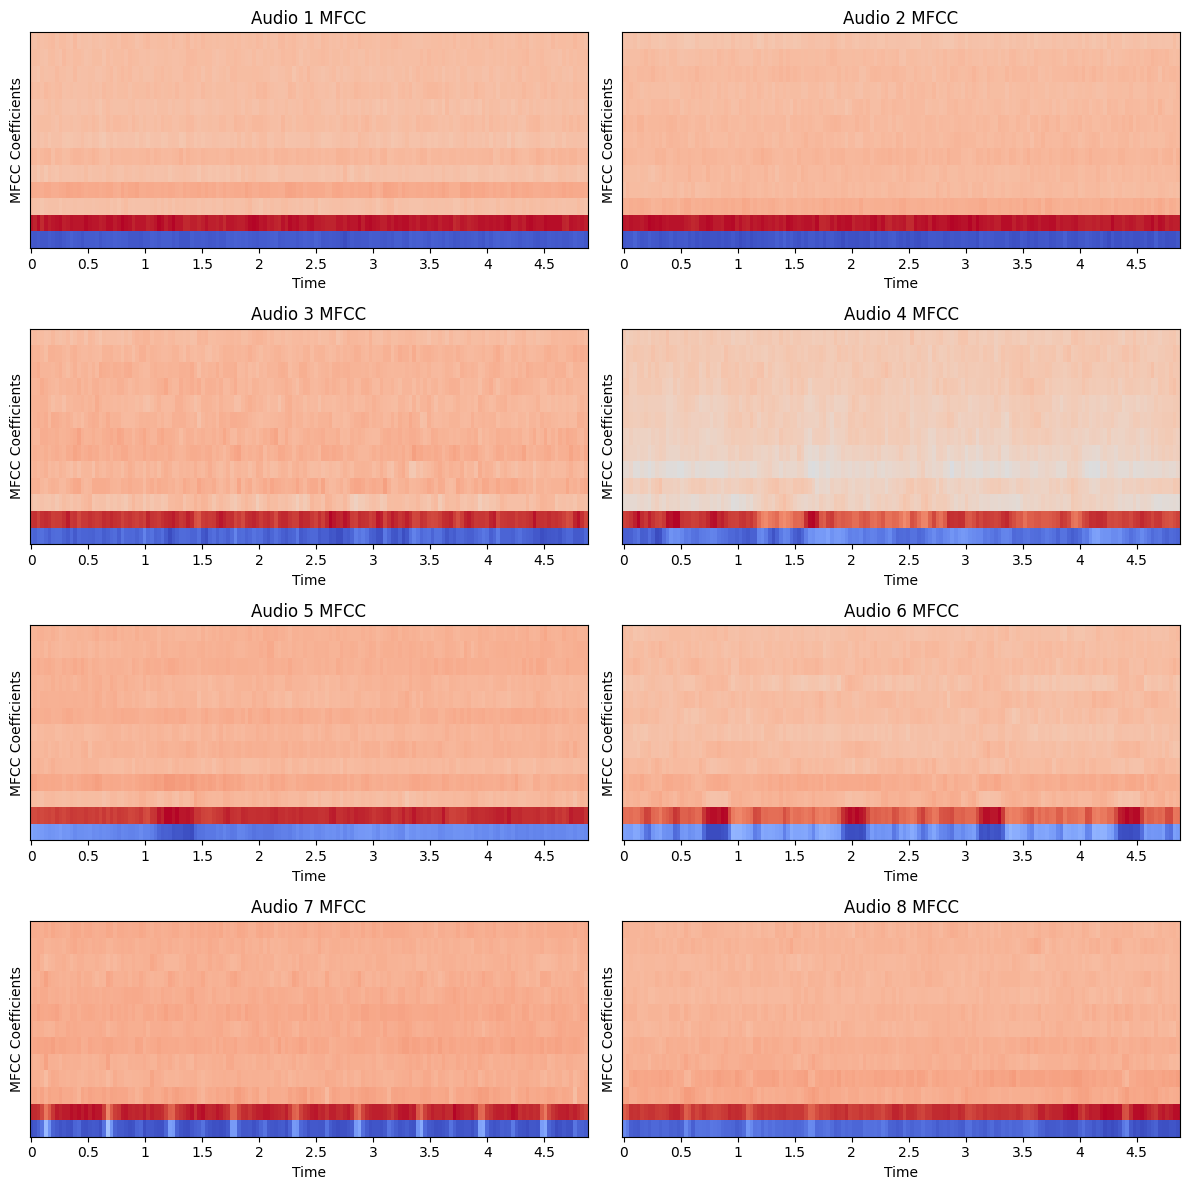

In [35]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制MFCC图谱
for i, ax in enumerate(axes.flatten()):
    mfcc_data = mfcc_0db[i]  # 假设mfcc_0db包含MFCC参数数据
    librosa.display.specshow(mfcc_data, x_axis='time', sr=sampling_rate, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_title(f'Audio {i+1} MFCC')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

### SNR: 6dB

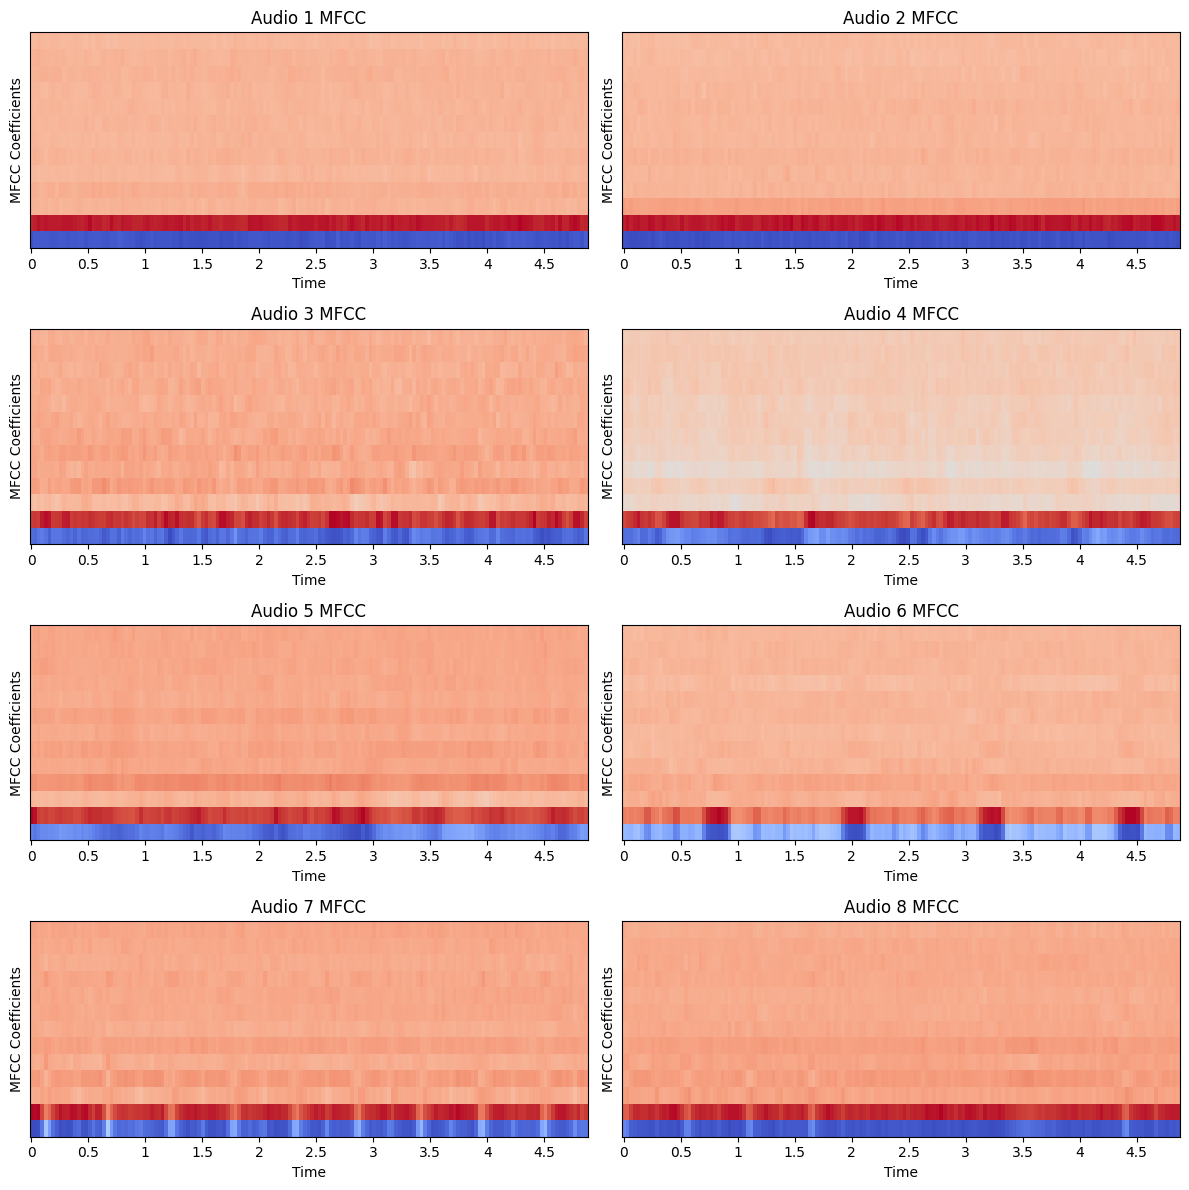

In [36]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制MFCC图谱
for i, ax in enumerate(axes.flatten()):
    mfcc_data = mfcc_6db[i]  # 假设mfcc_0db包含MFCC参数数据
    librosa.display.specshow(mfcc_data, x_axis='time', sr=sampling_rate, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_title(f'Audio {i+1} MFCC')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

### SNR: -6dB

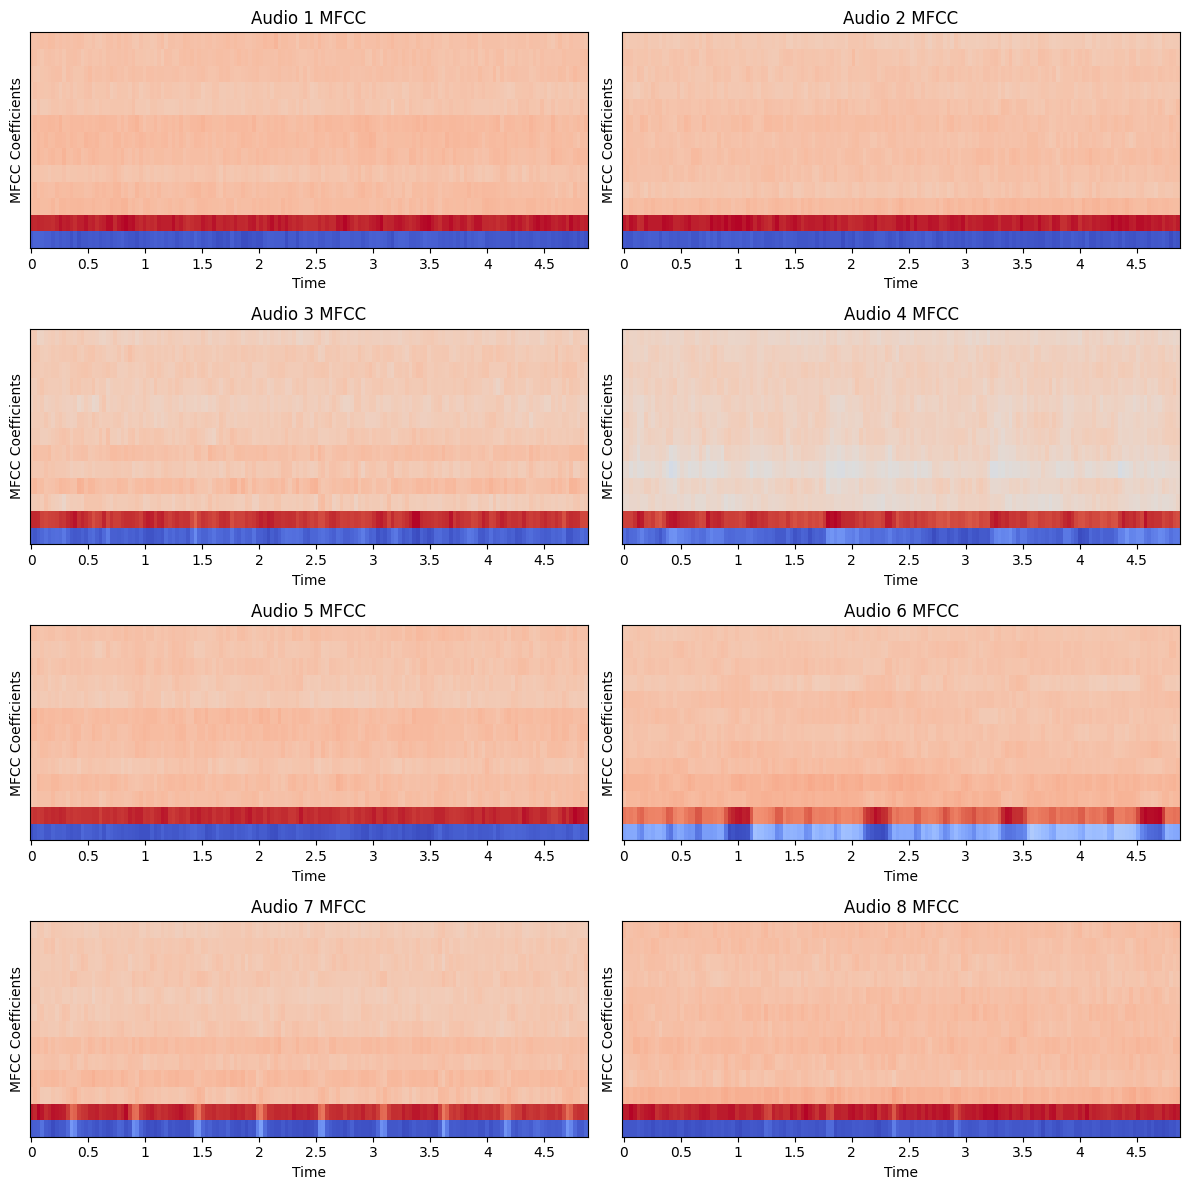

In [37]:
# 创建一个具有八个子图的图像对象
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# 循环遍历八个子图，并绘制MFCC图谱
for i, ax in enumerate(axes.flatten()):
    mfcc_data = mfcc_min6db[i]  # 假设mfcc_0db包含MFCC参数数据
    librosa.display.specshow(mfcc_data, x_axis='time', sr=sampling_rate, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_title(f'Audio {i+1} MFCC')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()